# Imports

In [1]:
# install additional packages if running on Emscripten
import platform

notebook_platform = platform.uname()
if notebook_platform.system == "Emscripten":
    import piplite

    await piplite.install(["openpyxl", "seaborn"])

In [2]:
from enum import Enum
import pathlib
import pandas as pd
import seaborn as sns

sns.set_style("ticks", {"axes.grid": True})

# Data

In [3]:
this_file = pathlib.Path().absolute()
data_dir = this_file.parent / "data"
data_dir

WindowsPath('c:/Users/Legion/workspace/tld_let_calibration/data')

In [4]:
radiation = Enum("rad_type", "proton Co60")
detector = Enum("detector", "mcp mts")

In [5]:
df_calib = pd.read_csv(data_dir / "interim" / "signal.csv")
df_calib

,detector,rad_type,det_id,filename,signal,proton_co60_ratio
0,mcp,Co60,1,1_5.dat,1.307468e+09,NaN
1,mcp,Co60,2,2_6.dat,1.236975e+09,NaN
2,mcp,Co60,3,3_7.dat,1.290799e+09,NaN
3,mcp,Co60,4,4_8.dat,1.288080e+09,NaN
4,mcp,Co60,5,5_9.dat,1.290176e+09,NaN
...,...,...,...,...,...,...
274,mts,proton,66,66_77.dat,8.324386e+07,1.008197
275,mts,proton,67,67b_81.dat,8.012930e+07,0.990298
276,mts,proton,68,68b_82.dat,8.093331e+07,0.967083
277,mts,proton,69,69b_83.dat,8.161040e+07,0.983827


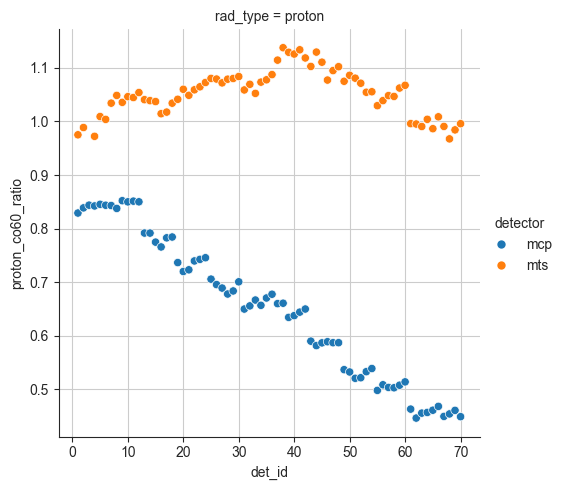

In [6]:
sns.relplot(
    data=df_calib[df_calib.rad_type == radiation.proton.name],
    x="det_id",
    y="proton_co60_ratio",
    hue="detector",
    col="rad_type",
    kind="scatter",
    facet_kws=dict(sharex=True, sharey=True),
)

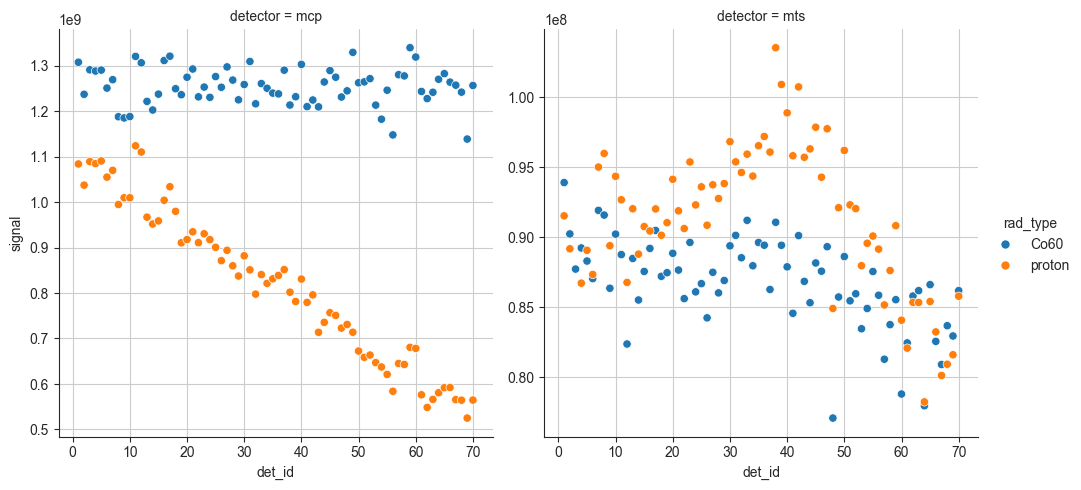

In [7]:
sns.relplot(
    data=df_calib,
    x="det_id",
    y="signal",
    hue="rad_type",
    col="detector",
    kind="scatter",
    facet_kws=dict(sharex=True, sharey=False),
)